In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Load the dataset (replace 'email.csv' with the correct path if necessary)
emails_df = pd.read_csv('email.csv')

In [21]:
# Preprocessing the data
# Convert 'Category' column to binary labels (ham = 0, spam = 1)
emails_df['Category'] = emails_df['Category'].map({'ham': 0, 'spam': 1})

In [22]:
# Drop rows with missing values
emails_df_clean = emails_df.dropna()

In [23]:
emails_df_clean.head(5)

,Category,Message
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
emails_df_clean.shape

(5572, 2)

<ipython-input-25-cab01191ac7a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=emails_df_clean, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


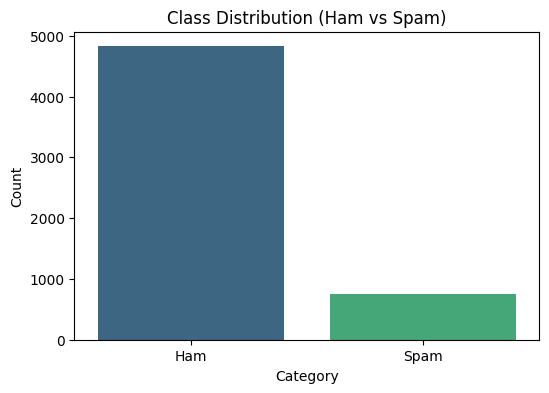

In [25]:
# Data visualization - class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=emails_df_clean, palette='viridis')
plt.title('Class Distribution (Ham vs Spam)')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [26]:
# Feature extraction (convert the text into numerical data using Bag-of-Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails_df_clean['Message'])  # Feature matrix
y = emails_df_clean['Category']  # Labels

In [27]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [29]:
# Predict on the test data
y_pred = nb_classifier.predict(X_test)

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [31]:
# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9857

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       966
         1.0       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [32]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

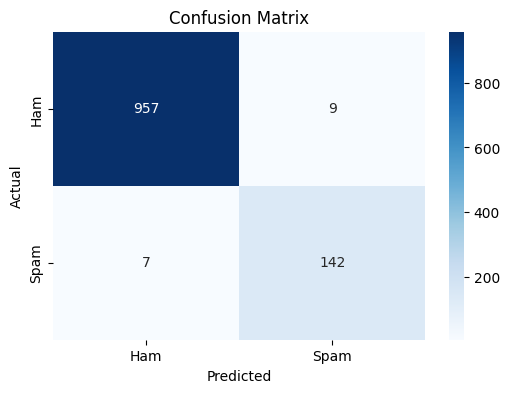

In [33]:
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# Test with a new email
new_email = ["We would like to congratulate you for your new position as our PhD Candidate at NTNU."]
new_email_transformed = vectorizer.transform(new_email)
prediction = nb_classifier.predict(new_email_transformed)

print(f"\nNew email prediction: {'Spam' if prediction[0] == 1 else 'Not Spam'}")


New email prediction: Not Spam


In [35]:
# Test with a new email
new_email = ["Congratulation! You just won a million US dollar, click here for claim."]
new_email_transformed = vectorizer.transform(new_email)
prediction = nb_classifier.predict(new_email_transformed)

print(f"\nNew email prediction: {'Spam' if prediction[0] == 1 else 'Not Spam'}")


New email prediction: Spam
